In [86]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from os.path import join as oj
import torch.utils.data as utils
from torchvision import datasets, transforms
import numpy as np
import os
import sys
pd.set_option('precision', 3)

In [215]:
save_path = "../results_for_export"
trained_model_folder = '../models/MNIST'
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 
results['final_acc'] = [max(x) for x in results['accs_test']] 
# results = results[results.method!= "ExpectedGrad"]

/home/lauri/.conda/envs/gpu_usage/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [216]:
results['final_acc'] = [max(x) for x in results['accs_test']] 
results['final_acc_train'] = [max(x) for x in results['accs_train']]
results['final_cd'] = [x[-1] for x in results['cd']]
results['final_test_loss'] = [min(x) for x in results['losses_test']]
results['final_train_loss'] = [min(x) for x in results['losses_train']]


In [220]:
results = results[results.dataset == "Color"]
# results = results[results.dataset == "Decoy"]


In [221]:


results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate','final_acc','final_acc_train','final_test_loss', 'final_cd', 'method', 'dataset', ]].sort_values(by = ['regularizer_rate'])

In [222]:
concise_results = results_save.groupby(by = ['dataset', 'method','regularizer_rate']).mean()
concise_results.columns = ['Test accuracy', 'Train accuracy', 'Test loss' , 'CD',]
# with open(oj(save_path, "color_mnist.text"), 'w') as f:
#           f.write(concise_results.to_latex())
concise_results

Test accuracy  Train accuracy  Test loss  \
dataset method     regularizer_rate                                             
Color   CDEP       0.0                       0.308         100.000     31.602   
                   0.1                       2.883         100.000     26.304   
                   1.0                       5.467         100.000     18.929   
                   5.0                      15.064          99.922     12.603   
                   10.0                     17.154          99.922     10.272   
                   50.0                     22.084          99.219      6.032   
                   100.0                    22.658          98.359      4.999   
                   500.0                    26.252          93.281      3.304   
                   1000.0                   25.190          90.625      2.589   
                   5000.0                   25.498          99.688      7.363   
        EGradients 0.1                       0.106         100.000     22.532   
                   1.0                       0.186         100.000     29.835   
                   500.0                     0.086         100.000     22.109   
                   1000.0                    0.360         100.000     21.703   
                   5000.0                    0.156         100.000     23.894   
        Grad       0.0                       0.296         100.000     26.906   
                   0.1                       0.010         100.000     22.696   
                   1.0                       0.050         100.000     26.653   
                   5.0                       0.228         100.000     26.878   
                   10.0                      0.298         100.000     26.726   
                   50.0                      0.330         100.000     26.575   
                   100.0                     0.348         100.000     26.788   
                   500.0                     0.390         100.000     26.540   
                   1000.0                    0.292         100.000     26.955   
                   5000.0                    0.006         100.000     21.045   

                                            CD  
dataset method     regularizer_rate             
Color   CDEP       0.0               0.000e+00  
                   0.1               6.498e-04  
                   1.0               7.451e-10  
                   5.0               2.149e-17  
                   10.0              6.076e-20  
                   50.0              2.673e-22  
                   100.0             4.352e-23  
                   500.0             2.273e-24  
                   1000.0            8.113e-25  
                   5000.0            1.452e-22  
        EGradients 0.1               0.000e+00  
                   1.0               0.000e+00  
                   500.0             0.000e+00  
                   1000.0            0.000e+00  
                   5000.0            0.000e+00  
        Grad       0.0               0.000e+00  
                   0.1               3.530e-11  
                   1.0               1.028e-10  
                   5.0               1.261e-10  
                   10.0              1.117e-10  
                   50.0              1.310e-10  
                   100.0             1.461e-10  
                   500.0             1.505e-10  
                   1000.0            1.126e-10  
                   5000.0            1.142e-10

In [223]:
concise_results

Test accuracy  Train accuracy  Test loss  \
dataset method     regularizer_rate                                             
Color   CDEP       0.0                       0.308         100.000     31.602   
                   0.1                       2.883         100.000     26.304   
                   1.0                       5.467         100.000     18.929   
                   5.0                      15.064          99.922     12.603   
                   10.0                     17.154          99.922     10.272   
                   50.0                     22.084          99.219      6.032   
                   100.0                    22.658          98.359      4.999   
                   500.0                    26.252          93.281      3.304   
                   1000.0                   25.190          90.625      2.589   
                   5000.0                   25.498          99.688      7.363   
        EGradients 0.1                       0.106         100.000     22.532   
                   1.0                       0.186         100.000     29.835   
                   500.0                     0.086         100.000     22.109   
                   1000.0                    0.360         100.000     21.703   
                   5000.0                    0.156         100.000     23.894   
        Grad       0.0                       0.296         100.000     26.906   
                   0.1                       0.010         100.000     22.696   
                   1.0                       0.050         100.000     26.653   
                   5.0                       0.228         100.000     26.878   
                   10.0                      0.298         100.000     26.726   
                   50.0                      0.330         100.000     26.575   
                   100.0                     0.348         100.000     26.788   
                   500.0                     0.390         100.000     26.540   
                   1000.0                    0.292         100.000     26.955   
                   5000.0                    0.006         100.000     21.045   

                                            CD  
dataset method     regularizer_rate             
Color   CDEP       0.0               0.000e+00  
                   0.1               6.498e-04  
                   1.0               7.451e-10  
                   5.0               2.149e-17  
                   10.0              6.076e-20  
                   50.0              2.673e-22  
                   100.0             4.352e-23  
                   500.0             2.273e-24  
                   1000.0            8.113e-25  
                   5000.0            1.452e-22  
        EGradients 0.1               0.000e+00  
                   1.0               0.000e+00  
                   500.0             0.000e+00  
                   1000.0            0.000e+00  
                   5000.0            0.000e+00  
        Grad       0.0               0.000e+00  
                   0.1               3.530e-11  
                   1.0               1.028e-10  
                   5.0               1.261e-10  
                   10.0              1.117e-10  
                   50.0              1.310e-10  
                   100.0             1.461e-10  
                   500.0             1.505e-10  
                   1000.0            1.126e-10  
                   5000.0            1.142e-10

/home/lauri/.conda/envs/gpu_usage/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


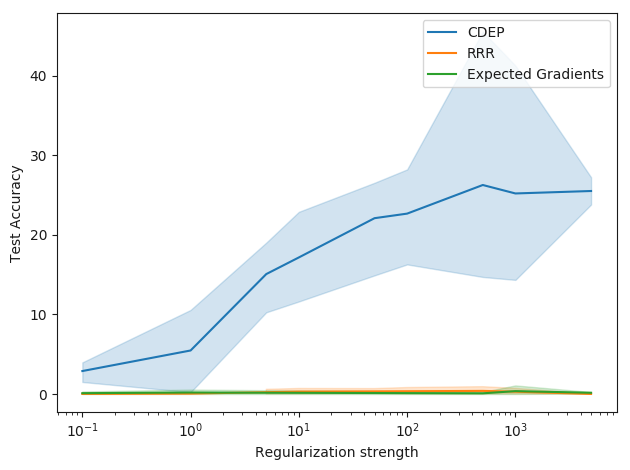

In [224]:
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'CDEP'],label="CDEP",legend = "brief"  );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'Grad'], label="RRR" );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'EGradients'], label="Expected Gradients");
plot.set(xscale="log")
#plot.set(yscale="log")

plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("");
fig  = plot.get_figure()
fig.tight_layout()
# fig.savefig(oj(save_path,"ColorMNIST_results"))
plt.show()